In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('database/email_phishing_data.csv')  # Replace with your actual filename

In [3]:
X = df.drop('label', axis=1)  # All columns except 'label'
y = df['label']               # Target column


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

svm_model = CalibratedClassifierCV(LinearSVC(class_weight='balanced', max_iter=10000))
svm_model.fit(X_resampled, y_resampled)



CalibratedClassifierCV(estimator=LinearSVC(class_weight='balanced',
                                           max_iter=10000))

In [15]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print("Before SMOTE:", dict(zip(unique, counts)))

unique, counts = np.unique(y_resampled, return_counts=True)
print("After SMOTE:", dict(zip(unique, counts)))


Before SMOTE: {np.int64(0): np.int64(362528), np.int64(1): np.int64(4864)}
After SMOTE: {np.int64(0): np.int64(362528), np.int64(1): np.int64(362528)}


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = svm_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred, zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5886798684060106
Precision: 0.021424753760403144
Recall: 0.6729016786570743
F1 Score: 0.041527305017019386
Confusion Matrix:
 [[91287 64082]
 [  682  1403]]


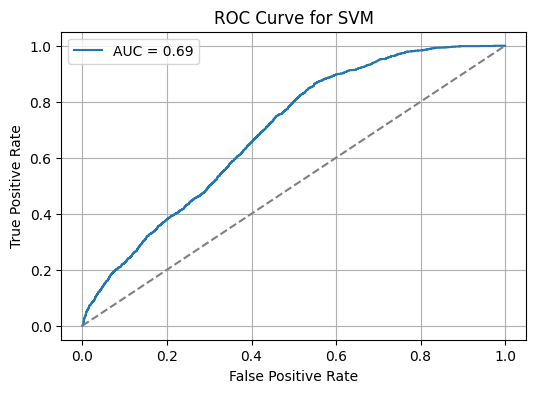

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_probs = svm_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM")
plt.legend()
plt.grid(True)
plt.show()


Learnings:
1. SVMs need scaling
2. takes lots of time training big dataset 
3. have to use linearSVc as normal svc was taking a lot of time
4. have to use SMOTE to get good results 

Accuracy: 0.5886798684060106
Precision: 0.021424753760403144
Recall: 0.6729016786570743
F1 Score: 0.041527305017019386
Confusion Matrix:
 [[91287 64082]
 [  682  1403]]